# Module 4 & 5 - Data Visualization and Interpretation

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

Diamonds are analyzed for quality by the 4Cs: cut, carat, clarity and color.
Cut: ranked as Fair, Good, Very Good, Premium and Ideal - most important quality 
Carat - weight of the diamond when cut
Color - Color of the diamond, with D being the best and J the worst 
Clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 
Depth - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter 
Table - table%: The width of the diamond's table expressed as a percentage of its average diameter
Price - the price of the diamond
x - length mm 
y - width mm 
z - depth mm

Table(54-57%) and depth(61-62.5%) percentages are the main measurements that determine the quality of cut and are used to weed out poorly cut diamonds.

Source: https://beyond4cs.com/grading/depth-and-table-values/

In [17]:
# read the csv dataset for diamonds

dsloc = 'C:/Users/jaysh/Documents/DataAnalytic/Data/diamonds.csv'
df = pd.read_csv(dsloc)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
#rename the pound/hashtag(#) column so it doesn't cause further issues
df.rename(columns={'Unnamed: 0': 'Number'}, inplace =True)

In [19]:
#validate
df.head()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# CHECK TO SEE HOW MANY RECORDS ARE IN INITIAL DATASET

In [20]:
df.tail()

,Number,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [21]:
#set INDEX
df.set_index('Number', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth_percent','table_percent','price', 'l_mm','w_mm','d_mm']

#change column names for readability
df.columns = columns
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# CLEAN THE DATA

In [23]:
dupe = df.duplicated() #creates list of True/False values
df[dupe] #shows rows where duplicated is True

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm
Number,,,,,,,,,,
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2184,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2821,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3157,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3705,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97


# DELETE 146 RECORDS OF DUPLICATED DATA


In [24]:
#drops duplicate rows 
df.drop_duplicates()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


# CHECK NA VALUES AND DELETE; RESULTS REFLECTED NO NA VALUES

In [25]:

#drop rows with any missing data
df_no_missing = df.dropna()
df_no_missing

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm
Number,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


# FIND THE MAX PRICE AND DISPLAY THE ROW

In [26]:
xx = df['price'].max()
maxrowprice = df[df['price']==xx]
maxrowprice.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm
Number,,,,,,,,,,
27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


## FIND THE MEDIAN PRICE AND DISPLAY ROW

In [27]:
xx = df['price'].median()
medianprice = df[df['price']==xx]
medianprice.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm
Number,,,,,,,,,,
51710,0.58,Ideal,F,VS2,61.8,57.0,2401,5.39,5.35,3.32
51711,0.72,Very Good,I,VS1,60.7,56.0,2401,5.78,5.82,3.52
51712,0.70,Very Good,F,SI1,63.5,56.0,2401,5.58,5.66,3.57
51713,0.78,Very Good,G,SI2,63.7,55.9,2401,5.82,5.85,3.72
51714,0.72,Very Good,E,SI2,62.2,59.0,2401,5.72,5.79,3.58


### Determine the Shapes of Diamonds 

In [28]:
import numpy as np

### Diamond Shapes 
Heart Shaped Diamond- Cut Guide,Table % - 53 - 63, Depth % - 58 - 62, L/W Ratio - .95 - 1.02

Round Shaped Diamond-  Cut Guide,Table % - 53 - 58,Depth % - 59 - 62.3,L/W Ratio - 1.00

Princess Shaped Diamond- Cut Guide,Table %  - 67 - 72,Depth % - 64 - 75,L/W Ratio -  1.05 - 1.08

Oval Shaped Diamond- Cut Guide, Table % - 53 - 63   , Depth % - 58 - 62   , L/W Ratio - 1.35 - 1.6

Marquise Shaped Diamond- Cut Guide, Table %- 53 - 63   , Depth %- 58 - 62  , L/W Ratio - 1.75-2.15

Pear Shaped Diamond- Cut Guide, Table %-53 - 63  , Depth %- 58 - 62  , L/W Ratio - 1.40 - 1.70

Emerald Shaped Diamond- Cut Guide, Table %-61 - 69  , Depth %- 61 - 67  , L/W Ratio - 1.35 - 1.60

Asscher Shaped Diamond- Cut Guide, Table %-61 - 69   , Depth %- 61 - 67, L/W Ratio - 1.03 - 1.08

Radiant Shaped Diamond- Cut Guide, Table % - 61 - 69  , Depth % - 61 - 67  , L/W Ratio - 1.15 - 1.35

Cited from: https://www.lumeradiamonds.com/diamond-education/



In [29]:
# Calculated Length/Width Ratio to get a better picture of the diamond shape 
#f np.where(df['w_mm'] > 0):
df['LWRatio'] = np.divide(df['l_mm'], df['w_mm'])
df['design'] = np.where((df['w_mm'] > 0) & (df['l_mm'] == df['w_mm']),'Round', 
                        np.where(((df['LWRatio'] >= .95) & (df['LWRatio']<1.03)),'Heart',
                                 np.where(((df['LWRatio'] >= 1.03) & (df['LWRatio'] < 1.05)), 'Asscher', 
                                          np.where(((df['LWRatio'] >= 1.05) & (df['LWRatio'] <= 1.08)),'Princess or Asscher',
                                                  np.where(((df['LWRatio'] > 1.08) & (df['LWRatio'] < 1.35)),'Radiant',
                                                          np.where(((df['LWRatio'] >= 1.35) & (df['LWRatio'] < 1.40)),'Emerald or Oval',
                                                                  np.where(((df['LWRatio'] >= 1.40) & (df['LWRatio'] <= 1.60)),'Emerald, Pear or Oval',
                                                                           np.where(((df['LWRatio'] > 1.60) & (df['LWRatio'] <= 1.70)),'Pear',
                                                                                   np.where((df['LWRatio'] > 1.70),'Marquise','Zero Divisor - N/A')))))))))
df.head()

C:\Users\jaysh\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm,LWRatio,design
Number,,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,Heart
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,Heart
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,Heart
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,Heart
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,Heart


### COUNT THE DIAMONDS BY SHAPE

In [30]:
 df['carat'].groupby(df['design']).count()


design
Asscher                     88
Emerald or Oval              1
Emerald, Pear or Oval        2
Heart                    53805
Pear                         2
Princess or Asscher         10
Radiant                      8
Round                       10
Zero Divisor - N/A          14
Name: carat, dtype: int64

# FIND THE MIN PRICE AND DISPLAY THE ROW


In [31]:
xy = df['price'].min()
minrowprice = df[df['price']==xy]
minrowprice.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm,LWRatio,design
Number,,,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,Heart
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,Heart


# FIND THE LARGEST SIZE CARAT

In [32]:
xcarat = df['carat'].max()
maxrowcarat = df[df['carat']==xcarat]
maxrowcarat.head()


,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm,LWRatio,design
Number,,,,,,,,,,,,
27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,1.018975,Heart


## FIND THE MEDIAN SIZE CARAT

In [33]:
xz = df['carat'].median()
mediancarat = df[df['carat']==xz]
mediancarat.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm,LWRatio,design
Number,,,,,,,,,,,,
91,0.7,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57,0.996503,Heart
93,0.7,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50,1.005291,Heart
96,0.7,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38,0.991525,Heart
97,0.7,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40,0.991319,Heart
119,0.7,Ideal,E,VS2,60.7,58.0,2762,5.73,5.76,3.49,0.994792,Heart


# FIND THE SMALLEST SIZE CARAT

In [34]:
xcarat = df['carat'].min()
minrowcarat = df[df['carat']==xcarat]
minrowcarat.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,l_mm,w_mm,d_mm,LWRatio,design
Number,,,,,,,,,,,,
15,0.2,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,1.010667,Heart
31592,0.2,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26,1.005305,Heart
31593,0.2,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24,1.007937,Heart
31594,0.2,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32,1.007937,Heart
31595,0.2,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28,1.010526,Heart


# DESCRIBES THE DATA

In [35]:
df.describe()

,carat,depth_percent,table_percent,price,l_mm,w_mm,d_mm,LWRatio
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


# Groups the data by clarity with an average value to each clarity category

In [36]:
df.groupby('clarity')
#add a stats or math function to it
df['price'].groupby(df['clarity']).median()


clarity
I1      3344
IF      1080
SI1     2822
SI2     4072
VS1     2005
VS2     2054
VVS1    1093
VVS2    1311
Name: price, dtype: int64

In [37]:
df.groupby('cut')
#add a stats or math function to it
df['price'].groupby(df['cut']).median()

cut
Fair         3282.0
Good         3050.5
Ideal        1810.0
Premium      3185.0
Very Good    2648.0
Name: price, dtype: float64

In [38]:
df['price'].groupby(df['color']).median()

color
D    1838.0
E    1739.0
F    2343.5
G    2242.0
H    3460.0
I    3730.0
J    4234.0
Name: price, dtype: float64

In [39]:
# PIVOT TABLE INDEXED ON CLARITY AND REFLECTING AVERAGE PRICE FOR EACH CLARITY CATEGORY
pd.pivot_table(df, index="clarity", values="price")

,price
clarity,
I1,3924.168691
IF,2864.839106
SI1,3996.001148
SI2,5063.028606
VS1,3839.455391
VS2,3924.989395
VVS1,2523.114637
VVS2,3283.737071


In [40]:
# PIVOT TABLE INDEXED ON CLARITY AND REFLECTING THE AVERAGE CARAT SIZE
pd.pivot_table(df, index="clarity", values=["carat"])

,carat
clarity,
I1,1.283846
IF,0.505123
SI1,0.850482
SI2,1.077648
VS1,0.727158
VS2,0.763935
VVS1,0.503321
VVS2,0.596202


In [41]:
import warnings
warnings.filterwarnings(action='once')

# PLOT THE DATA 

## This shows a plot graph with Table (face of the diamond) vs Price of diamonds.
## Conclusion with this plot graphic is the majority of the Tables (face size of the diamond) lie between 50mm and 70mm ranging in price from 326 dollars to 18,823 dollars.

C:\Users\jaysh\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


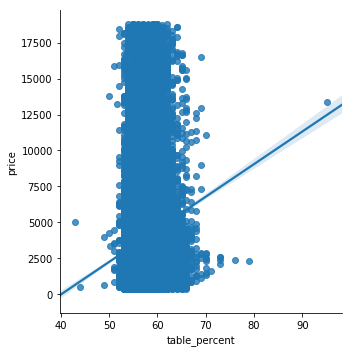

In [42]:
#clarity vs. price
sns.lmplot(x='table_percent', y='price', data=df)

## This is Carat vs. Price of the diamonds.
## Conclusion there seems to be a positive relationship between the carat and price of the 
## diamond and all diamonds appear to be under $20,000.

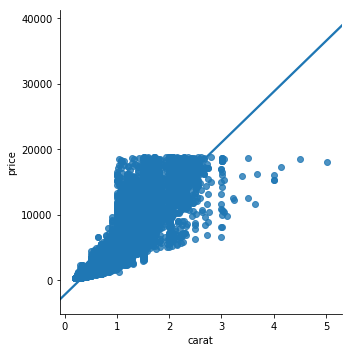

In [43]:
#Carat Vs. price 
sns.lmplot(x='carat', y='price', data=df)

## This scatter plot shows the relationship of carats to price and the breakdown of the cut in the relationship.
## Conclusion is the majority of diamonds appear to be either Fair or Very Good cut diamonds and Ideal diamonds are under 3 carats.

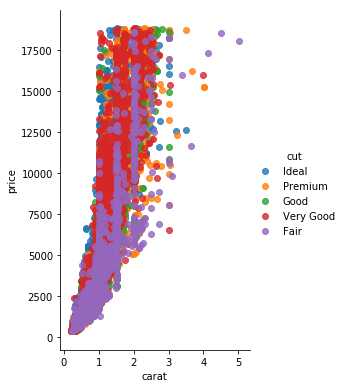

In [44]:
#add more details to scatterplot
sns.lmplot(x='carat', y='price',data=df, height=5.5,aspect=.7,
           fit_reg=False, #remove regression line
           hue='cut')   #color by cut of the diamond

## This is a boxplot showing the relationship of color to carat.
## Conclusion with this data is more diamonds are of I color (and under 3 carats). The larger carat diamonds have a J color

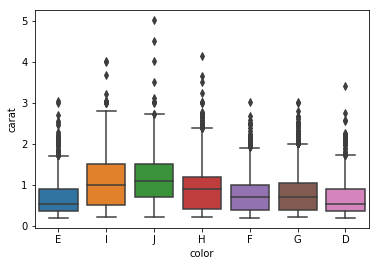

In [45]:
#boxplot showing stats for each characteristic
box_df = df.drop(['l_mm','w_mm','d_mm'],axis=1)
sns.boxplot(x='color', y='carat', data=box_df)

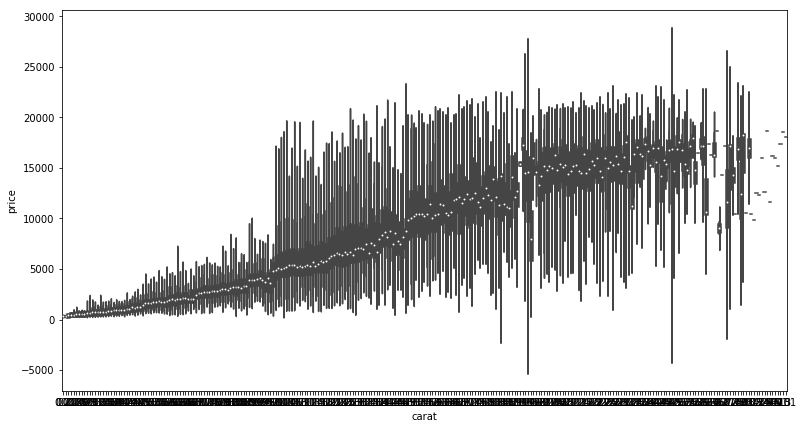

In [46]:
#change size of plot
plt.subplots(figsize=(13,7))

#violin plot shows the distribution of attack power for each type
sns.violinplot(x='carat', y='price', data=df)

## This shows the clairity of the diamond in relationship to the carat.
## Conclusion from this data is the larger carat diamonds are I1 in clarity and under 1 carat diamonds are mostly VVS1.


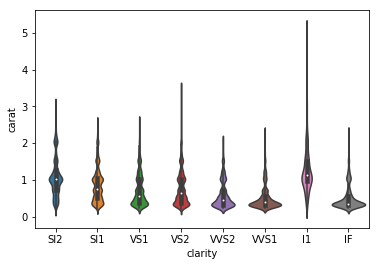

In [47]:
sns.violinplot(x='clarity',y='carat',data=df)

### SCATTER PLOT SHOWING THE RELATIONSHIP OF PRICE AND CARAT WITH CLARITY OF DIAMONDS.
### THIS SHOWS A STRONG POSITIVE RELATIONSHIP 

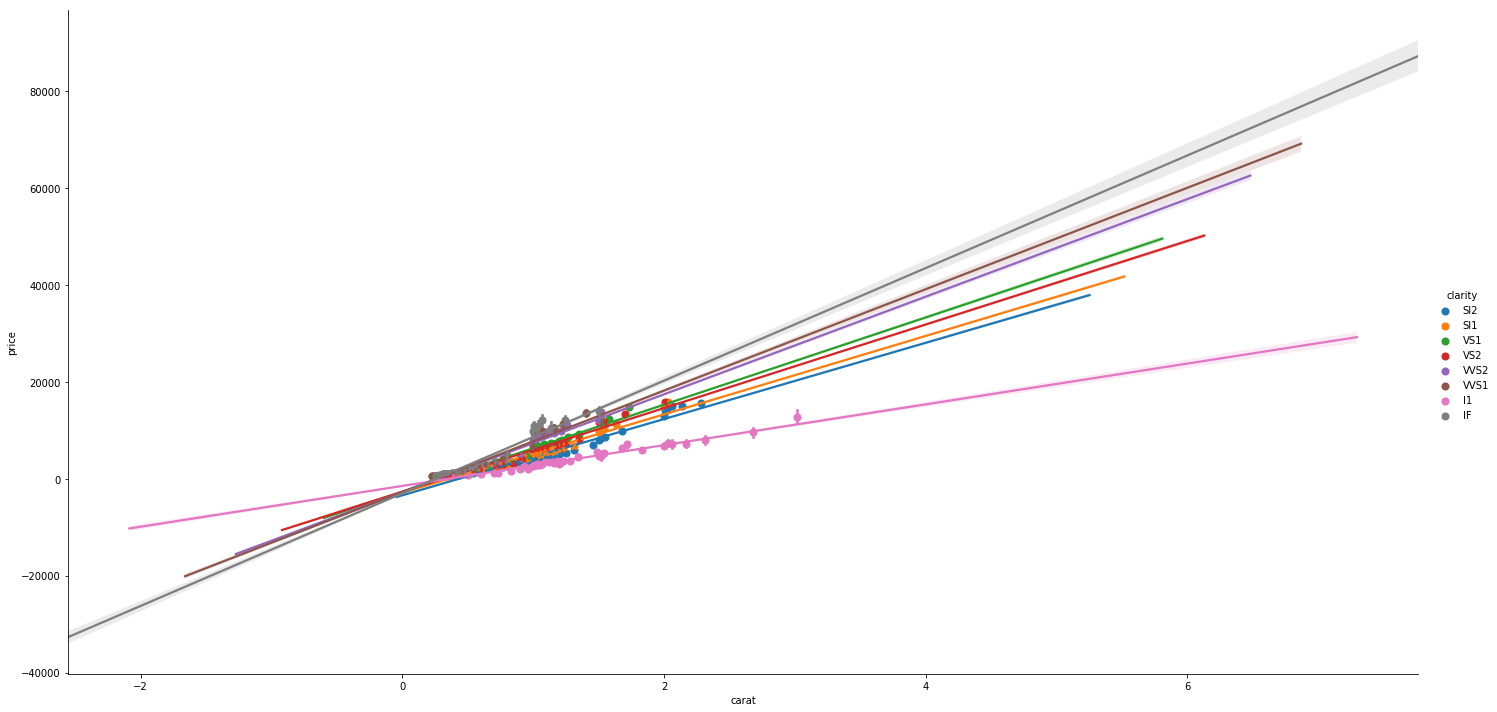

In [48]:
g = sns.lmplot(x='carat', y='price', hue='clarity', x_bins=50, height=10,aspect=2, data=df)

### Visualize all Types by Stat

In [49]:
#create a column that contains all stat types and a column for their corresponding value
melt_df = pd.melt(df, 
                  id_vars=['clarity', 'cut', 'color'], #column to keep
                  var_name="Stat")

melt_df.head()

,clarity,cut,color,Stat,value
0,SI2,Ideal,E,carat,0.23
1,SI1,Premium,E,carat,0.21
2,VS1,Good,E,carat,0.23
3,VS2,Premium,I,carat,0.29
4,SI2,Good,J,carat,0.31


In [50]:
#melted datframe has 6 times the amount of rows as original stats dataframe
#6 rows for each pokemon for each stat type
print(df.shape)
print(melt_df.shape)

(53940, 12)
(485460, 5)


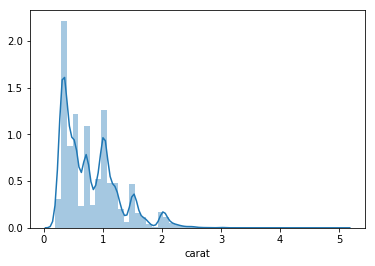

In [51]:
#create a histogram 
sns.distplot(df['carat'])

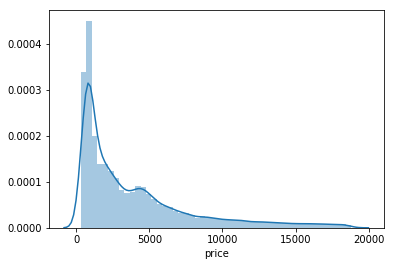

In [52]:
sns.distplot(df['price'])

### SUMMARY CONCLUSION ABOUT THE DIAMOND CSV DATA
 Initially 53,940 records.
 146 records were duplicates and removed resulting in 53,794 records to analyze.
 The diamonds range in price from 346 to 18,823 dollars.
 The carat size ranges from .2 cts to 5.01 cts. 
 There is a positive relationship between Price and Carat.
 The majority of the diamonds are Ideal cuts, G in color, and SI1 clarity.  
 The average size of diamond is ~ .80 cts. and average price of 3933 dollars however it is not a true representation of the diamond data. The histograms of price and carat reflect the diamond data is not a Normal Distribution but a Poisson Distribution which means the data is heavily represented in one area more than the rest of the data. Using the median data would be a more acurate representation of the data so therefore the Median size of diamond is ~ .70 cts and median price is 2401 dollars.
 
 The majority of the diamonds appear to be Heart Shaped.